In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [4]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
data = pd.read_csv(next(iter(uploaded)))
data.head()


Saving fraudTest.csv.zip to fraudTest.csv.zip


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicates
duplicates = data.duplicated().sum()
print("Duplicates:", duplicates)

# Clean data by dropping duplicates
data = data.drop_duplicates()


Missing Values:
 Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64
Duplicates: 0


In [6]:
from sklearn.ensemble import IsolationForest

# Select numerical columns for detection
num_data = data.select_dtypes(include='number')

# Train Isolation Forest model
model = IsolationForest(contamination=0.02, random_state=42)
data['anomaly'] = model.fit_predict(num_data)

# Label anomalies as fraudulent
data['is_fraud'] = data['anomaly'].apply(lambda x: 1 if x == -1 else 0)

# Display fraudulent transactions
fraudulent_transactions = data[data['is_fraud'] == 1]
print("Fraudulent Transactions:\n", fraudulent_transactions)


Fraudulent Transactions:
         Unnamed: 0 trans_date_trans_time               cc_num  \
16              16   2020-06-21 12:18:54  4906628655840914250   
21              21   2020-06-21 12:20:42  4560004149983868183   
55              55   2020-06-21 12:31:23  4855488158131690372   
68              68   2020-06-21 12:34:35  4710826438164847414   
70              70   2020-06-21 12:35:55  4956828990005111019   
...            ...                   ...                  ...   
555608      555608   2020-12-31 23:18:32      341546199006537   
555613      555613   2020-12-31 23:20:18  4742883543039288059   
555616      555616   2020-12-31 23:22:02         503874407318   
555637      555637   2020-12-31 23:30:29     6011109736646996   
555711      555711   2020-12-31 23:57:56      341546199006537   

                                     merchant        category      amt  \
16                         fraud_Hickle Group    shopping_pos     2.33   
21                       fraud_Gottlieb Group

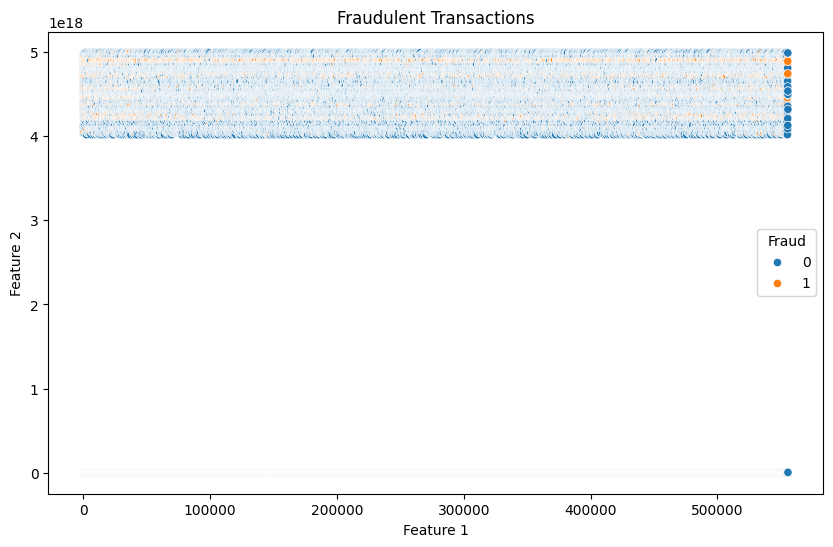

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of transactions with anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(x=num_data.iloc[:, 0], y=num_data.iloc[:, 1], hue=data['is_fraud'])
plt.title("Fraudulent Transactions")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Fraud")
plt.show()


In [11]:
fraudulent_transactions.to_csv("fraud_report.csv", index=False)
from google.colab import files
files.download("fraud_report.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>